In [199]:
%matplotlib inline
import math 
import random 
import matplotlib.pyplot as plt
import numpy as np
import time

Efficient Bandit algorithm: 

Given two models, design a bandit algorithm that optimizes for 
- Learning rate 
- Profit for users

In [255]:
def model(conversion_rate = 0.01):
    pass 

def get_decision(p):
    # give 0/1 
    if random.random() > p:
        return 0
    return 1

def naive_bandit(
    cvr_t = 0.01,
    cvr_c = 0.02,
    t_bandit = 0.5,
    num_samples = 10000,
    mini_batch = 100,
):
    random.seed(time.clock())
    bandit = min(0.95, max(0.05, t_bandit))
    imps_t = imps_c = 0 
    convs_t = convs_c = 0 
    model_convs_t = model_convs_c = 0
    status = []
    status.append((imps_t + imps_c, bandit, imps_t, imps_c, convs_t, convs_c, model_convs_t, model_convs_c))
    while (imps_t + imps_c < num_samples):
        decision_t = get_decision(cvr_t)
        decision_c = get_decision(cvr_c)
        
        # conversions from each model 
        model_convs_t += decision_t 
        model_convs_c += decision_c 
        
        if get_decision(bandit):
            # user test 
            imps_t += 1
            convs_t += decision_t
        else:
            # user control 
            imps_c += 1
            convs_c += decision_c
            
        n_samples = imps_t + imps_c 
        if n_samples >= num_samples:
            break 
            
        current_cvr_t = 1.0 * convs_t / max(1, imps_t)
        current_cvr_c = 1.0 * convs_c / max(1, imps_c)
        if (n_samples % mini_batch == 0 and convs_t + convs_c > 0):
            # update bandit 
            bandit = max(0.01, min(0.99, current_cvr_t / (current_cvr_t + current_cvr_c)))
        
        # Logging 
        status.append((imps_t + imps_c, bandit, imps_t, imps_c, convs_t, convs_c, model_convs_t, model_convs_c)) 
        
    return status 

In [278]:
print get_decision(0.5)
status = naive_bandit(
    cvr_t=0.04,
    cvr_c=0.03,
    t_bandit=0.5, 
    num_samples=10000, 
    mini_batch=1000,
)

1


In [279]:
print len(status)
print status[-1] 

10000
(9999, 0.5658474043253181, 5488, 4511, 238, 145, 430, 295)


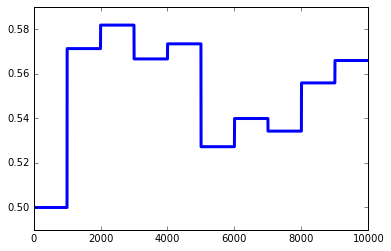

In [280]:
x = np.array([value[0] for value in status])
y = np.array([value[1] for value in status])
#plt.ylim([0.0, 0.6])
line, = plt.plot(x, y, '-', linewidth=3)

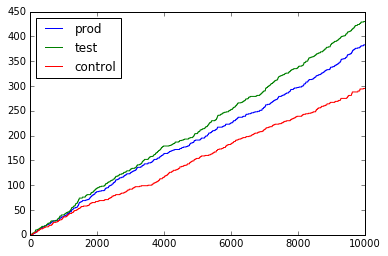

In [282]:
samples = np.array([value[0] for value in status]) 
convs_prod = np.array([value[4] + value[5] for value in status]) 
convs_test_model = np.array([value[6] for value in status]) 
convs_control_model = np.array([value[7] for value in status]) 
line, = plt.plot(samples, convs_prod, '-', linewidth=1, label='prod')
line, = plt.plot(samples, convs_test_model, '-', linewidth=1, label='test')
line, = plt.plot(samples, convs_control_model, '-', linewidth=1, label='control') 
plt.legend(loc=2)

In [245]:
print status[0]

(0, 0.5, 0, 0, 0, 0, 0, 0)


In [201]:
time.clock()

14.075508